<h1><center><b>Yoga Pose Recognition </b></center></h1>


 <img src="https://previews.123rf.com/images/inarik/inarik1410/inarik141000014/32595833-joga-stanowi-sylwetka-kobiety-samodzielnie-na-bia%C5%82ym-tle-zestaw-ludzie-postaci-w-sport-gimnastyka-tr.jpg">



 ## **I'm trying only three poses:**

### ***Three_Class_Pose: T-Pose,Tree-Pose, Warrior-Pose,Unknown-Pose***

### **Steps:**

1. Install the MediaPipe package and OpenCV

2. Import Necessary Library

3. Initialize the Mp,Pose

4. Read Image and Identify Keypoint of human body

5. Pose Estimate the input image

6. Function in detect and recognition pose in keypoint using Mediapipe

7. Output_Prediction

<h1><center><b>Pose Estimation ---> MediaPipe</b></center></h1>

<img src="https://google.github.io/mediapipe/images/logo_horizontal_color.png">

MediaPipe is Google's open-source framework, used for media processing. It is cross-platform or we can say it is platform friendly. It is run on Android, iOS, web, and YouTube servers that's what Cross-platform means, to run everywhere.

 #### **Reference: MediaPipe-->[https://google.github.io/mediapipe/solutions/pose.html](http://)**

# **Install Package**

# **Import Necessary Library**

In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from IPython.display import HTML

# **MediaPipe Package initialze**

In [2]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5,
            min_tracking_confidence=0.5)
# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

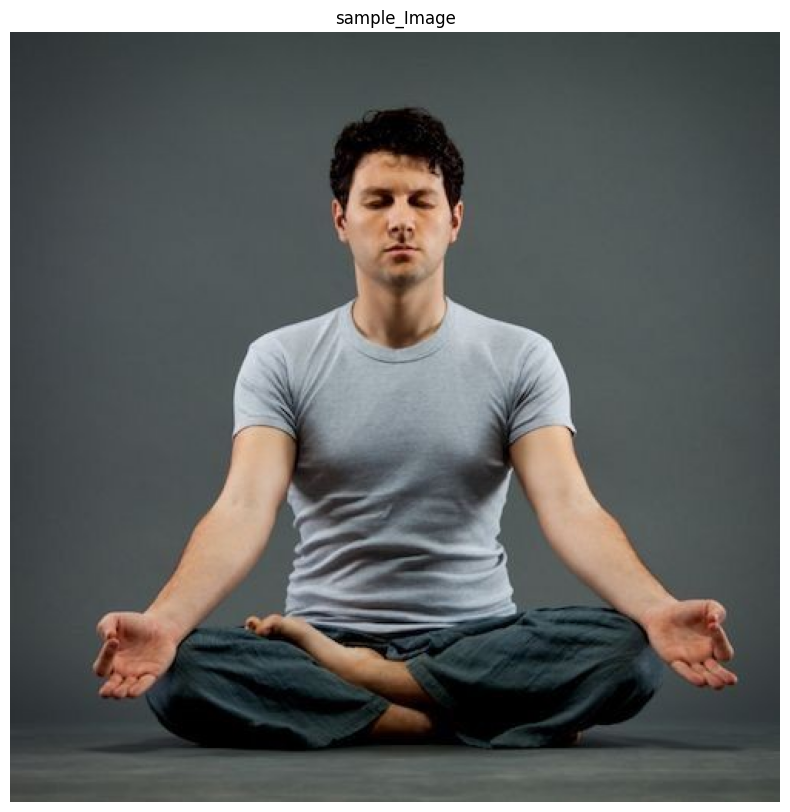

In [3]:
#Input_Image
sample_img  = cv2.imread('unknown.jpg')
plt.figure(figsize = [10,10])
plt.title("sample_Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

<h1><center><b>Landmark --> Keypoint_Identification</b></center></h1>

<img align='center' src="https://miro.medium.com/max/1400/1*-5YeZDrwsfHCGmOj8NFOsg.jpeg">

# **Identify Point in 2 keypoint_Landmark**

In [4]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.5117645859718323
y: 0.2552448511123657
z: -0.45533567667007446
visibility: 0.999994158744812

LEFT_EYE_INNER:
x: 0.5281355977058411
y: 0.2244049310684204
z: -0.41698741912841797
visibility: 0.9999961853027344



In [5]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 255.88229298591614
y: 127.62242555618286
z: -227.66783833503723
visibility: 0.999994158744812

LEFT_EYE_INNER:
x: 264.06779885292053
y: 112.2024655342102
z: -208.49370956420898
visibility: 0.9999961853027344



# **Generate CSV for landmark---> keypoint for each position(different poses keypoint convert to csv file)**

### ***Reference: [https://www.kaggle.com/venkatkumar001/pose-prediction-generate-csv-keypoints-mediapipe](http://)***



# **Pose_Estimation**

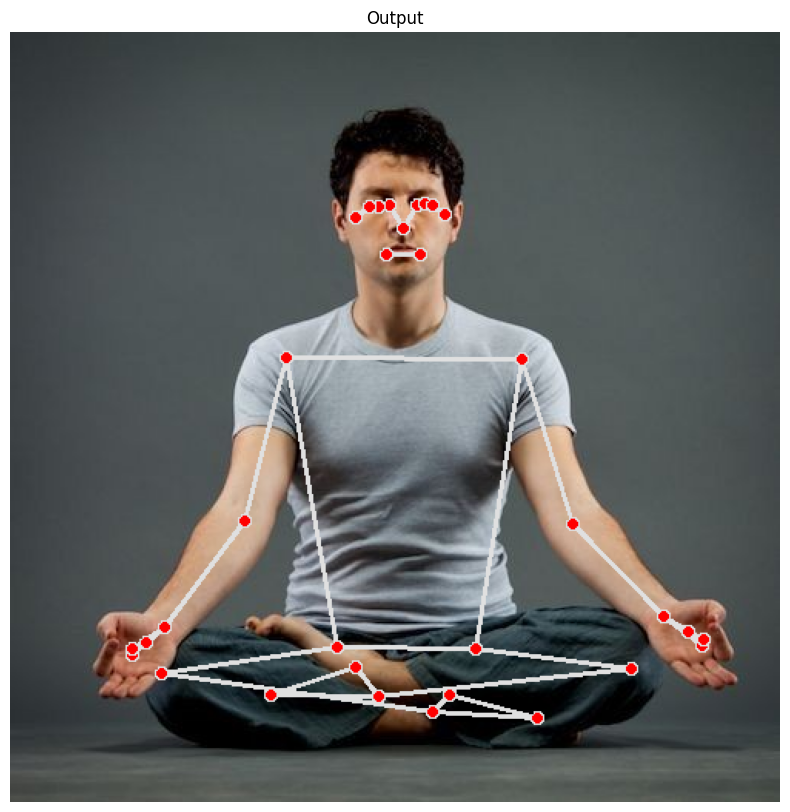

In [6]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

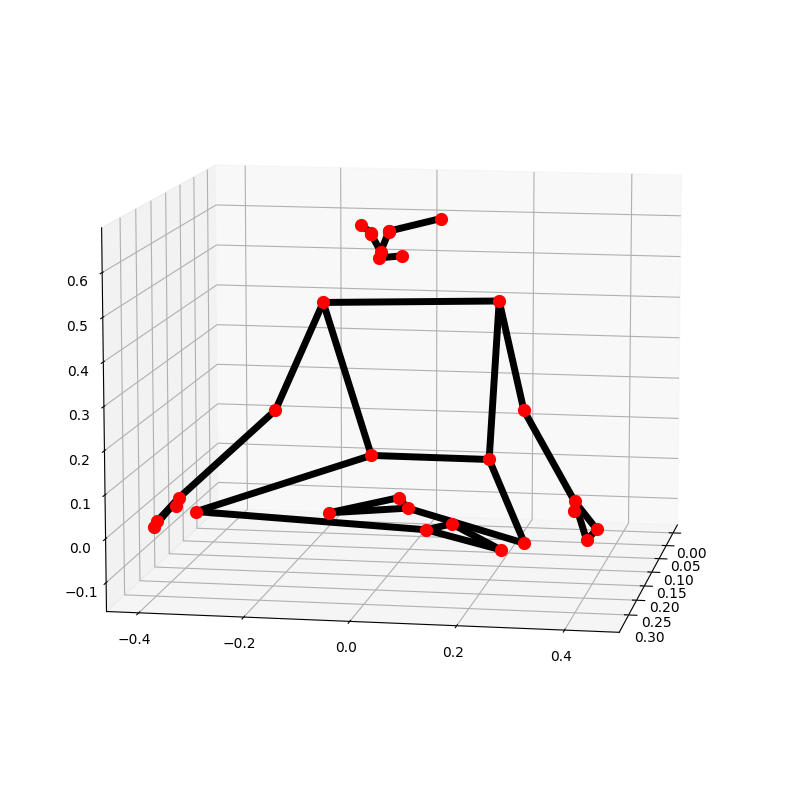

In [7]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

# **DetectPose and Recognition**

In [8]:
import cv2
def detectPose(image, pose, display=False):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z )))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        # plt.figure(figsize=[22,22])
        # plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        # plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        #draw in cv2
        cv2.imshow('Output Image', output_image)
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

In [9]:
# Read another sample image and perform pose detection on it.
image = cv2.imread('unknown.jpg')
op, lm = detectPose(image, pose, display=False)
print(f'Landmarks: {lm}')

Landmarks: [(255, 127, -0.45533567667007446), (264, 112, -0.41698741912841797), (269, 111, -0.41713225841522217), (274, 112, -0.4173443019390106), (246, 112, -0.419390469789505), (239, 113, -0.4194835126399994), (233, 113, -0.41950762271881104), (282, 118, -0.1907203048467636), (224, 120, -0.20117801427841187), (266, 144, -0.3729640543460846), (244, 144, -0.3752683997154236), (332, 212, -0.1673099398612976), (179, 211, -0.17650315165519714), (365, 319, -0.22951869666576385), (152, 317, -0.24067983031272888), (424, 379, -0.5519784688949585), (100, 386, -0.5709362626075745), (449, 398, -0.6037178635597229), (79, 404, -0.6257292032241821), (450, 394, -0.6830222606658936), (79, 400, -0.6953115463256836), (440, 389, -0.5908840894699097), (88, 396, -0.6052151322364807), (302, 400, -0.0034926950465887785), (212, 399, 0.0034329162444919348), (403, 413, -0.5729972720146179), (98, 416, -0.5755261778831482), (239, 431, -0.21436744928359985), (274, 441, -0.31788182258605957), (224, 412, -0.1539634

# **Calculate_Angle_Keypoints**

In [10]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.

    '''

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [11]:
#Calculate angles with 3d landmarks
def angle3d(lm1, lm2, lm3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.

    '''


    # Get the required landmarks coordinates.
    x1, y1, z1 = lm1
    x2, y2, z2 = lm2
    x3, y3, z3 = lm3

    #Calculate the angle between the three points with lm2 as the vertex
    v1 = np.array([x1 - x2, y1 - y2, z1 - z2])
    v2 = np.array([x3 - x2, y3 - y2, z3 - z2])
    v1 = v1 / np.linalg.norm(v1) if np.linalg.norm(v1) != 0 else v1
    v2 = v2 / np.linalg.norm(v2) if np.linalg.norm(v2) != 0 else v2
    angle = np.degrees(np.arccos(np.dot(v1, v2)))
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle
    


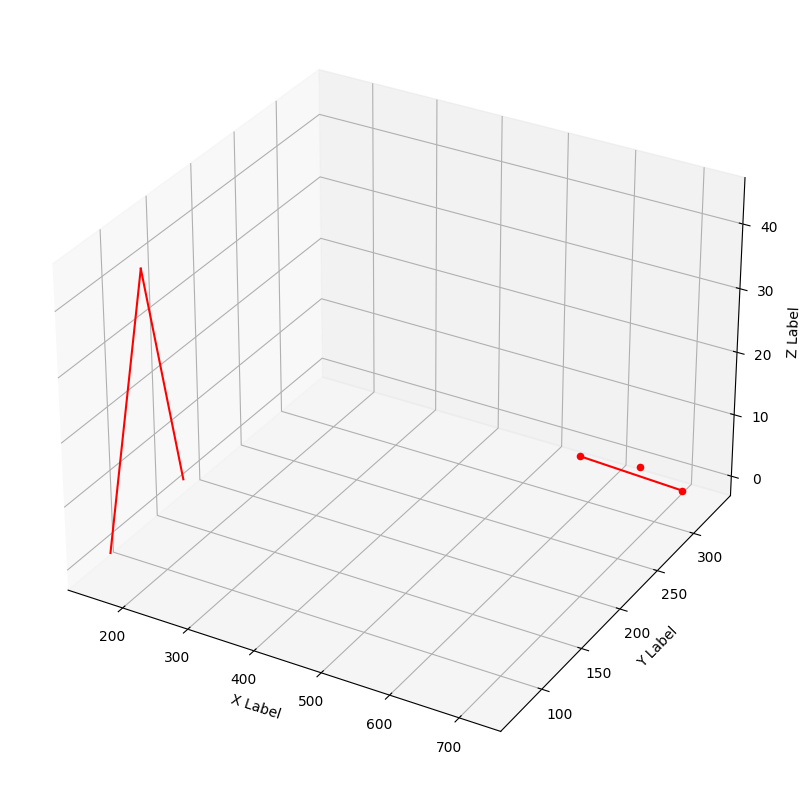

The calculated angle is 166.26373169437744
The calculated angle is 166.2637316943775


In [12]:

angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))
angle3= angle3d((558, 326, 0), (642, 333, 0), (718, 321, 0))
((156, 69, 1.772277295589447), (185, 93, 43.86442393064499), (211, 113, 10.066182546317577))

#plot the 3d landmarks in matplotlib
fig = plt.figure(figsize = [10, 10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(558, 326, 0, c='r', marker='o')
ax.scatter(642, 333, 0, c='r', marker='o')
ax.scatter(718, 321, 0, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#draw the lines
ax.plot([156, 185], [69, 93], [1.772277295589447, 43.86442393064499], color='r')
ax.plot([185, 211], [93, 113], [43.86442393064499, 10.066182546317577], color='r')
ax.plot([558, 718], [326, 321], [0, 0], color='r')
plt.show()


# Display the calculated angle.
print(f'The calculated angle is {angle}')
print(f'The calculated angle is {angle3}')

# **Class_Pose--> T-pose, Tree-pose, Warrior-Pose, Unknown**

In [13]:
def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: A image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label 
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.

    '''
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:

        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:

    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:

                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose' 
            

                        
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the T pose.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:

                # Specify the label of the pose that is tree pose.
                label = 'T Pose'

    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the tree pose.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:

            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'
                
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0,0,255)  
    
    # Write the label on the output image. 
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        # plt.figure(figsize=[10,10])
        # plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 5)

        cv2.imshow("Output Image", output_image)
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

# **Recognition_Pose**

In [14]:
# # Read a sample image and perform pose classification on it.
# image = cv2.imread('unknown1.jpg')
# output_image, landmarks = detectPose(image, pose, display=False)
# if landmarks:
#     classifyPose(landmarks, output_image, display=True)

In [15]:
# #now infer on video

# mp_video = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5,min_tracking_confidence=0.5)

# cap = cv2.VideoCapture(0) # By default webcam is index 0


# # # Read in sample image to estimate camera intrinsic
# # ret, img = cap.read(0)
# # # img = cv2.resize(img, None, fx=0.5, fy=0.5)
# # img_width  = img.shape[1]
# # img_height = img.shape[0]
# # intrin = {
# #     'fx': img_width*0.9, # Approx 0.7w < f < w https://www.learnopencv.com/approximate-focal-length-for-webcams-and-cell-phone-cameras/
# #     'fy': img_width*0.9,
# #     'cx': img_width*0.5, # Approx center of image
# #     'cy': img_height*0.5,
# #     'width': img_width,
# #     'height': img_height,
# # }

# while cap.isOpened():
#     ret, img = cap.read()
#     if not ret:
#         cap.set(cv2.CAP_PROP_POS_FRAMES, 0) # Loop back
#         ret, img = cap.read()
#         # break

#     # Flip image for 3rd person view
#     # img = cv2.flip(img, 1)
#     # img = cv2.resize(img, None, fx=0.5, fy=0.5)

#     # To improve performance, optionally mark image as not writeable to pass by reference
#     # img.flags.writeable = False

#     # Feedforward to extract keypoint
    

#     # Compute FPS
     

#     # img.flags.writeable = True

#     # Display keypoint
#     output_image, landmarks = detectPose(img, mp_video, display=False)
#     if landmarks:
#         fin, label = classifyPose(landmarks, output_image, display=False) 
        
#         cv2.putText(fin, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0,0,225), 5)

#         cv2.imshow('Output Image', fin)

    
      

#     k = cv2.waitKey(1)
#     if k == 27:         # wait for ESC key to exit and terminate progra,
#         cv2.destroyAllWindows()
#         break
    
  

# #mp_video.pipe.close()
# cap.release()

In [16]:
def capturePose(posename):
    mp_video = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5,min_tracking_confidence=0.5)

    cap = cv2.VideoCapture(0) # By default webcam is index 0
    
    
    while cap.isOpened():
        ret, img = cap.read()
        if not ret:
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0) # Loop back
            ret, img = cap.read()
        img = cv2.flip(img, 1)
        output_image, landmarks = detectPose(img, mp_video, display=False)

        try:
            left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                            landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                            landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])

        # Get the angle between the right shoulder, elbow and wrist points. 
            right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                            landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                            landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
            
            # Get the angle between the left elbow, shoulder and hip points. 
            left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                                landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                                landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

            # Get the angle between the right hip, shoulder and elbow points. 
            right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                                landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

            # Get the angle between the left hip, knee and ankle points. 
            left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                            landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                            landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

            # Get the angle between the right hip, knee and ankle points 
            right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                            landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                            landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

            text = "Good"
            if posename == 'tree':

                
                if left_shoulder_angle < 110 or right_shoulder_angle < 110:
                    text = "Raise Hands more"

                elif not(left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195):
                    text = "Straighten one leg and bend the other"
                        
            # Check if the other leg is bended at the required angle.
                elif not(left_knee_angle > 300 and left_knee_angle < 355 or right_knee_angle > 10 and right_knee_angle < 65):
                    text = "Bend one leg more"
                        # Specify the label of the pose that is tree pose.
                        
                else:
                    text = "Good"
                        
            elif posename == 'tpose':
                if not(left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195) or not(left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110) :
                    text = "Straighten your arms to the sides"

                elif not(left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195):

                    # Specify the label of the pose that is tree pose.
                    text = "Straighten your legs"
                else:
                    text = "Good"

            elif posename == 'warrior':
                if not(left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195) or not(left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110) :
                    text = "Straighten your arms to the sides"

                elif not(left_knee_angle > 165 and left_knee_angle < 195) and not(right_knee_angle > 165 and right_knee_angle < 195):
                    text = "Straighten one leg and bend the other"
                    # Check if the other leg is bended at the required angle.
                elif not(right_knee_angle > 80 and right_knee_angle < 130) and  not(left_knee_angle > 240 and left_knee_angle < 280):
                    text = "Bend one leg"
                        # Specify the label of the pose that is Warrior II pose.
                else:
                    text = "Good"
            if text=='Good':
                color = (0,255,0)
            else:
                color = (0,0,255)
            cv2.putText(output_image, text, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 5)
        
        except:
            cv2.putText(output_image, "Make sure full body is visible", (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 3)

        cv2.imshow('Output Image', output_image)
        

        k = cv2.waitKey(1)
        if k == 27:         # wait for ESC key to exit and terminate progra,
            cv2.destroyAllWindows()
            break
    
  

#mp_video.pipe.close()
    cap.release()

In [17]:
# #Take user input to select the pose
# print("Select the pose you want to perform:")
# print("1. Tree Pose")
# print("2. Warrior II Pose")
# print("3. T Pose")
# pose = int(input("Enter the pose you want to perform: "))
# #1 = 'tree pose'
# #2 = 'warrior II pose'
# #3 = 'T pose'
# if pose==1:
#     #open seperate window for demo image
#     demo = cv2.imread('tree.png')
#     cv2.imshow('Demo',demo)
#     capturePose('tree')
# elif pose==2:
#     #open seperate window for demo image
#     demo = cv2.imread('warriorIIpose1.jpg')
#     cv2.imshow('Demo',demo)
#     capturePose('warrior')
# elif pose==3:
#     #open seperate window for demo image
#     demo = cv2.imread('tpose.jpg')
#     cv2.imshow('Demo',demo)
#     capturePose('tpose1')


In [18]:
#Prepare joint angle dataset from photos
import cv2
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
import mediapipe as mp

# Initializing mediapipe pose class.
def populate_row(img,label,test = False):
      mp_pose = mp.solutions.pose
      
      # Setting up the Pose function.
      pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5,
                  min_tracking_confidence=0.5)
      output_image, lm = detectPose(img, pose, display=False)
      # Initializing mediapipe drawing class, useful for annotation.
      #mediapipe gives 33 landmarks, create a list of all the joint angles possible
      #dict of all possible joint angles
      #handle missing landmarks
      
      joint_angles_dict = {}
      try:
            joint_angles_dict['left_elbow_angle'] = angle3d(lm[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                                            lm[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                                lm[mp_pose.PoseLandmark.LEFT_WRIST.value]) 
      except:
            joint_angles_dict['left_elbow_angle'] = None

      try:

      
            joint_angles_dict['right_elbow_angle'] = angle3d(lm[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                                      lm[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                          lm[mp_pose.PoseLandmark.RIGHT_WRIST.value])
      
      except:
            joint_angles_dict['right_elbow_angle'] = None
      
      try:
            joint_angles_dict['left_shoulder_angle'] = angle3d(lm[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                                      lm[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                          lm[mp_pose.PoseLandmark.LEFT_HIP.value])
      except:
            joint_angles_dict['left_shoulder_angle'] = None
      try:
            joint_angles_dict['right_shoulder_angle'] = angle3d(lm[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                                      lm[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                                lm[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
      except:
            joint_angles_dict['right_shoulder_angle'] = None
      try:
            joint_angles_dict['left_knee_angle'] = angle3d(lm[mp_pose.PoseLandmark.LEFT_HIP.value],
                                                lm[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                          lm[mp_pose.PoseLandmark.LEFT_ANKLE.value])
      except:
            joint_angles_dict['left_knee_angle'] = None
      try:
            joint_angles_dict['right_knee_angle'] = angle3d(lm[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                                      lm[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                          lm[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
           

      except:
            joint_angles_dict['right_knee_angle'] = None
      try:
            joint_angles_dict['left_hip_angle'] = angle3d(lm[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                                lm[mp_pose.PoseLandmark.LEFT_HIP.value],
                                                lm[mp_pose.PoseLandmark.LEFT_KNEE.value])
      except:
            joint_angles_dict['left_hip_angle'] = None
      try:
            joint_angles_dict['right_hip_angle'] = angle3d(lm[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                                lm[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                                lm[mp_pose.PoseLandmark.RIGHT_KNEE.value])
      except:
            joint_angles_dict['right_hip_angle'] = None
      try:
            joint_angles_dict['left_ankle_angle'] = angle3d(lm[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                                      lm[mp_pose.PoseLandmark.LEFT_ANKLE.value],
                                                lm[mp_pose.PoseLandmark.LEFT_HEEL.value])
      except:
            joint_angles_dict['left_ankle_angle'] = None
      try:
            joint_angles_dict['right_ankle_angle'] = angle3d(lm[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                                      lm[mp_pose.PoseLandmark.RIGHT_ANKLE.value],
                                                lm[mp_pose.PoseLandmark.RIGHT_HEEL.value])
      except:
            joint_angles_dict['right_ankle_angle'] = None


      #distance between two palms
      try:
            height, width, _ = img.shape
            palm_dist = np.array(lm[mp_pose.PoseLandmark.LEFT_WRIST.value])-np.array(lm[mp_pose.PoseLandmark.RIGHT_WRIST.value])
            if label=='tree':
                  #palms are in the same plane, so we only need 2d distance
                  palm_dist = np.array([palm_dist[0]/height,palm_dist[1]/width])
            else:
                  palm_dist = np.array([palm_dist[0]/height,palm_dist[1]/width,palm_dist[2]])
            joint_angles_dict['palm_distance'] = np.linalg.norm(palm_dist)
      except:
            joint_angles_dict['palm_distance'] = None
      #distance between two ankles
      try:
            height, width, _ = img.shape
            ankle_dist = np.array(lm[mp_pose.PoseLandmark.LEFT_ANKLE.value])-np.array(lm[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
            if label=='tree': 
                  #ankles are in the same plane, so we only need 2d distance
                  ankle_dist = np.array([ankle_dist[0]/height,ankle_dist[1]/width])
            else:
                  ankle_dist = np.array([ankle_dist[0]/height,ankle_dist[1]/width],ankle_dist[2])
            joint_angles_dict['ankle_distance'] = np.linalg.norm(ankle_dist)
      except:
            joint_angles_dict['ankle_distance'] = None
      
     
      #normalized vector from hip to head
      try:
            midpoint = (np.array(lm[mp_pose.PoseLandmark.LEFT_HIP.value])+np.array(lm[mp_pose.PoseLandmark.RIGHT_HIP.value]))/2
            v = np.array(lm[mp_pose.PoseLandmark.NOSE.value])-midpoint
            joint_angles_dict['hip_head_vector'] = v/np.linalg.norm(v)
      except:
            joint_angles_dict['hip_head_vector'] = None

      if label=='tree' or label=='warrior':
            lk = 0 if joint_angles_dict['left_knee_angle']==None else joint_angles_dict['left_knee_angle']
            rk = 0 if joint_angles_dict['right_knee_angle']==None else joint_angles_dict['right_knee_angle']
            lh = 0 if joint_angles_dict['left_hip_angle']==None else joint_angles_dict['left_hip_angle']
            rh = 0 if joint_angles_dict['right_hip_angle']==None else joint_angles_dict['right_hip_angle']
            la = 0 if joint_angles_dict['left_ankle_angle']==None else joint_angles_dict['left_ankle_angle']
            ra = 0 if joint_angles_dict['right_ankle_angle']==None else joint_angles_dict['right_ankle_angle']

            ls = 0 if joint_angles_dict['left_shoulder_angle']==None else joint_angles_dict['left_shoulder_angle']
            rs = 0 if joint_angles_dict['right_shoulder_angle']==None else joint_angles_dict['right_shoulder_angle']
            le = 0 if joint_angles_dict['left_elbow_angle']==None else joint_angles_dict['left_elbow_angle']
            re = 0 if joint_angles_dict['right_elbow_angle']==None else joint_angles_dict['right_elbow_angle']
            
            #Due to bad data, we need to filter out some poses
            if ls < 90 or rs < 90 or joint_angles_dict['palm_distance']>0.2 :
                  return

            #now due to unsymmetrical pose, we need to exchange the angles of the legs, left --> max, right --> min
            joint_angles_dict['left_knee_angle'] = lk if lk>rk else rk
            joint_angles_dict['right_knee_angle'] = rk if lk>rk else lk
            joint_angles_dict['left_hip_angle'] = lh if lh>rh else rh
            joint_angles_dict['right_hip_angle'] = rh if lh>rh else lh
            # joint_angles_dict['left_ankle_angle'] = la if la>ra else ra
            # joint_angles_dict['right_ankle_angle'] = ra if la>ra else la
            # joint_angles_dict['left_shoulder_angle'] = ls if ls>rs else rs
            # joint_angles_dict['right_shoulder_angle'] = rs if ls>rs else ls
            # joint_angles_dict['left_elbow_angle'] = le if le>re else re
            # joint_angles_dict['right_elbow_angle'] = re if le>re else le


      


      if test:
            return joint_angles_dict, lm, output_image
      

      
      #populate a row
      row = []
      for key in joint_angles_dict:
            row.append(joint_angles_dict[key])
      row.append(label)
      #append to csv
      with open('joint_angles.csv', 'a',newline='') as f:
            writer = csv.writer(f)
            writer.writerow(row)
      #close csv
            f.close()

      




In [19]:
#RUN Only for populating the csv file with new data
#iterate through all the images in the folder DATASET/TRAIN/tree
# import os
# from os import listdir
# from os.path import isfile, join
# mypath = 'DATASET/TRAIN/tree'
# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# n = 0
# for i in files:
#       img = cv2.imread(join(mypath, i))
#       populate_row(img, 'tree') #Pass image and the label
    
        



In [20]:
df = pd.read_csv('joint_angles.csv')
df.describe()
vec_tree = df.loc[df['label'] == 'tree']['hip_head_vector']
vec_tree = vec_tree.to_numpy()
vec_dog = df.loc[df['label'] == 'downdog']['hip_head_vector']
vec_dog = vec_dog.to_numpy()


#parse each element of the form [x y z] which is a string to get [x,y,z] numpy array 
# vector_list = df['hip_head_vector'].to_numpy()
for i in range(len(vec_tree)):
    vec = vec_tree[i]
    vec = vec[1:-1]
    vec = vec.split()
    vec = [float(j) for j in vec]
    vec_tree[i] = np.array(vec)

avg_vector = np.mean(vec_tree,axis=0)
std_vector = np.std(vec_tree,axis=0)
print(avg_vector)
print(std_vector)


[ 0.01090314 -0.99603179 -0.00175952]
[0.08610785 0.01949835 0.00198593]


In [21]:
#calculate mean and std of each joint angle
df = pd.read_csv('joint_angles.csv')
df.describe()

#remove outliers
#remove rows with any NaN values
#remove rows with any value outside 4 std 
# for col in df.columns:
#       if col!='pose':
#             df = df[np.abs(df[col]-df[col].mean()) <= (4*df[col].std())]


#create diff dfs for each pose
df_tree = df[df['label']=='tree']
df_warrior = df[df['label']=='warrior']
df_dog = df[df['label']=='downdog']
df_poses = {'tree':df_tree, 'downdog':df_dog}
for i in df_poses:
      for col in df_poses[i].columns:
            if col!='label'and col!='hip_head_vector':
                  df_poses[i] = df_poses[i][np.abs(df_poses[i][col]-df_poses[i][col].mean()) <= (4*df_poses[i][col].std())]
            # if col=='palm_distance' or col=='ankle_distance':
            #       df_poses[i] = df_poses[i][np.abs(df_poses[i][col]-df_poses[i][col].mean()) <= (4*df_poses[i][col].std())]
                  

# #z score = (x - mean)/std
# #Creating dict of confidence intervals
ci = {}
# #iterate over rows
for i in df_poses:
      pose_ci = {}
      for col in df_poses[i].columns:
            #if column is not pose
            if col!='label' and col!='hip_head_vector':
                  #calculate mean and std
                  mean = df_poses[i][col].mean()
                  std = df_poses[i][col].std()
                  #z value for 95% confidence interval is 1.96
                  pose_ci[col] = [mean-1.96*std, mean+1.96*std]
                  print(i,col, pose_ci[col])
      ci[i] = pose_ci

df_tree.describe()
           

tree left_elbow_angle [101.94726090665148, 192.0707279855984]
tree right_elbow_angle [103.92450232413262, 194.34282386214528]
tree left_shoulder_angle [158.9148640494601, 184.8353251076269]
tree right_shoulder_angle [156.50292350559167, 185.32261906683456]
tree left_knee_angle [166.73436136392374, 186.81179037690922]
tree right_knee_angle [-7.543061923529798, 83.08684891078099]
tree left_hip_angle [170.16150059136655, 183.3089248175626]
tree right_hip_angle [103.8746348195679, 139.62927023825446]
tree left_ankle_angle [132.07781540865903, 188.64575611280782]
tree right_ankle_angle [130.10712023595283, 186.20772925887036]
tree palm_distance [0.006843031279393584, 0.06350794663541973]
tree ankle_distance [0.06935480933662275, 0.49038332998958933]
downdog left_elbow_angle [146.77653396911995, 183.55319904455814]
downdog right_elbow_angle [146.1814710552757, 183.86489053120786]
downdog left_shoulder_angle [143.27221169762134, 191.91000426070985]
downdog right_shoulder_angle [147.0286701832

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,left_hip_angle,right_hip_angle,left_ankle_angle,right_ankle_angle,palm_distance,ankle_distance
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,148.438781,150.883016,171.335624,170.456877,171.855188,46.089167,174.502485,123.310895,156.384549,156.032188,0.041978,0.260611
std,23.388584,23.635341,7.951726,8.307713,23.231142,37.216709,11.350291,15.145377,24.489537,15.507076,0.026081,0.114896
min,82.652641,85.181511,139.150824,136.918672,25.737690,4.228617,112.955005,92.743450,0.418129,120.505465,0.006944,0.013427
25%,139.398410,139.179241,168.192639,166.706409,175.812634,27.258484,175.573341,116.662943,146.044908,145.807308,0.029927,0.167625
50%,153.579339,154.497240,174.076987,172.256462,177.710518,31.471188,177.103351,121.540065,162.653057,159.236952,0.035253,0.297157
75%,167.378515,168.621915,176.531105,175.648891,178.787224,52.300345,178.848560,125.593246,173.667027,166.299696,0.043962,0.354040
max,176.541769,179.863402,179.930800,179.965628,179.967080,177.815898,179.963229,176.710763,178.524302,179.450487,0.145512,0.540969


In [22]:
#for new image check if the joint angle is within the confidence interval
def test_pose(img_path, label):
      img = cv2.imread(img_path)
      joint_angles_dict, lm, op = populate_row(img, 'test', test=True)

      incorrect_angles = []
      correct = True
      for angle in joint_angles_dict:
            #if the joint angle is not None
            if angle!='hip_head_vector':
                  if joint_angles_dict[angle]!=None:
                        if joint_angles_dict[angle]<ci[label][angle][0] or joint_angles_dict[angle]>ci[label][angle][1]:
                              correct = False
                              print(angle, joint_angles_dict[angle], ci[label][angle])
                              incorrect_angles.append([angle, joint_angles_dict[angle], ci[label][angle]])
                        
      if correct:
            print('correct pose')
            print(joint_angles_dict)
      else:
            print('incorrect pose')
            print(incorrect_angles)

In [23]:
test_pose('dog1.webp','downdog')
test_pose('tree.png','tree')

left_knee_angle 144.0475333038697 [149.76753609085412, 193.7193095651268]
right_knee_angle 145.4451887516771 [152.12101468953603, 192.53127935535923]
incorrect pose
[['left_knee_angle', 144.0475333038697, [149.76753609085412, 193.7193095651268]], ['right_knee_angle', 145.4451887516771, [152.12101468953603, 192.53127935535923]]]
palm_distance 0.3107650982605404 [0.006843031279393584, 0.06350794663541973]
incorrect pose
[['palm_distance', 0.3107650982605404, [0.006843031279393584, 0.06350794663541973]]]


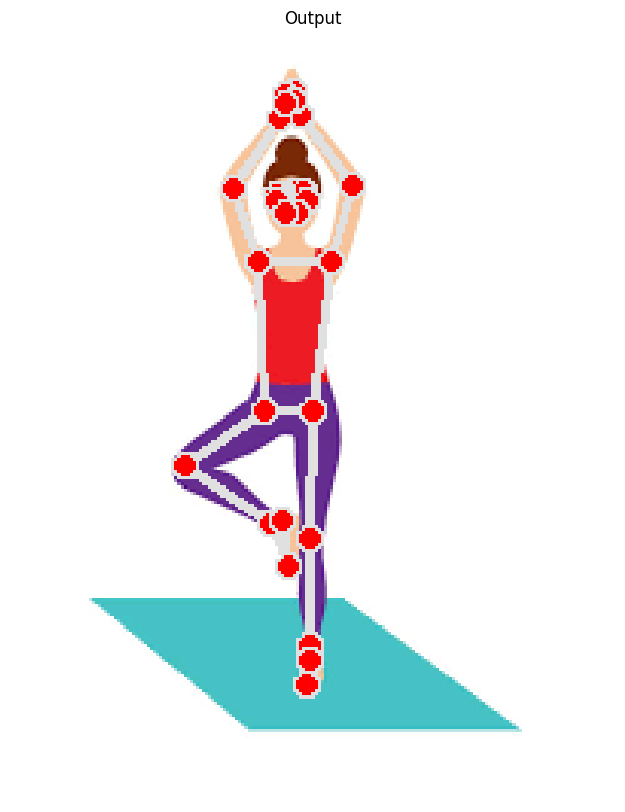

In [24]:
img_copy = cv2.imread('tree.png')
results = pose.process(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST])
    # print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST])
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()